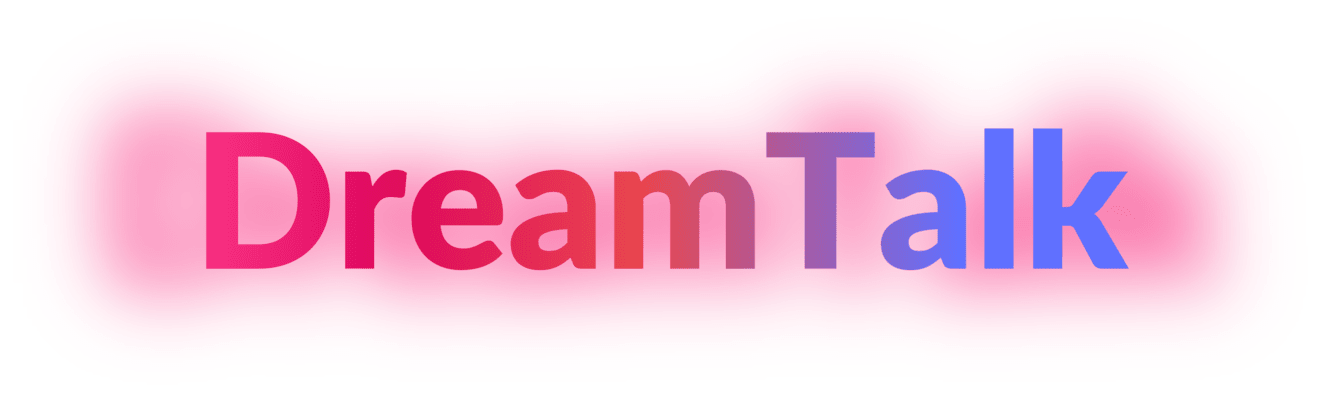
[https://dreamtalk-project.github.io/](https://dreamtalk-project.github.io/)

In [ ]:
#@title Acknowledgement
%cd /content
!wget https://github.com/neuralfalcon/DreamTalk-Colab-Demo/raw/main/demo.mp4
from IPython.display import clear_output
clear_output()
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/demo.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
#@title <-- Tap this if you running on Mobile { display-mode: "form" }


%%html
<b>Press play on the music player to keep the tab alive, then run the cell below</b><br/>
<audio src="https://raw.githubusercontent.com/KoboldAI/KoboldAI-Client/main/colab/silence.m4a" controls>

In [ ]:
#@title Install
import shutil

!rm -rf /content/dreamtalk
!rm -rf /content/DreamTalk-Colab-Demo
%cd /content
!git clone https://github.com/neuralfalcon/DreamTalk-Colab-Demo.git
!git clone -b dev https://github.com/camenduru/dreamtalk
%cd /content/dreamtalk
!git clone https://github.com/TencentARC/GFPGAN.git
!pip install -q yacs av gradio
!pip install onnx==1.14.0
!pip install insightface==0.7.3
!pip install onnxruntime
!pip install basicsr
!pip install facexlib
!pip install -r /content/dreamtalk/GFPGAN/requirements.txt
%cd /content/dreamtalk/GFPGAN
!python setup.py develop
%cd /content/dreamtalk/
!pip install realesrgan
from IPython.display import clear_output
clear_output()

In [ ]:
#@title Add features and fix bug
import shutil
import sys
# Get Python version
full_version = sys.version.split(' ')[0]
major_minor_version = '.'.join(full_version.split('.')[:2])
# Print Python version
# print("Python version:", major_minor_version)
# /usr/local/lib/python3.10/dist-packages/basicsr/data/degradations.py
basicsr_path=f"/usr/local/lib/python{major_minor_version}/dist-packages/basicsr/data/degradations.py"

# For Face detection in the Image Moving from dlib to insightface Because Full beard Man Can't detect by dlib
shutil.copy("/content/DreamTalk-Colab-Demo/utils.py","/content/dreamtalk/core/utils.py")
###GFPGAN model path Config (Codeformer is very Slow)
shutil.copy("/content/DreamTalk-Colab-Demo/inference_gfpgan.py","/content/dreamtalk/GFPGAN/inference_gfpgan.py")
# update :
# from torchvision.transforms.functional_tensor import rgb_to_grayscale
# to:
# from torchvision.transforms.functional import rgb_to_grayscale
shutil.copy("/content/DreamTalk-Colab-Demo/degradations.py",basicsr_path)

In [ ]:
#@title Download Models from Public Links
import os
from google.colab import files
import shutil
from zipfile import ZipFile
from tqdm import tqdm
import urllib
def conditional_download(url, download_file_path):
    print(f"Downloading {os.path.basename(download_file_path)}")
    base_path = os.path.dirname(download_file_path)

    if not os.path.exists(base_path):
        os.makedirs(base_path)

    if os.path.exists(download_file_path):
        os.remove(download_file_path)

    try:
        request = urllib.request.urlopen(url)  # type: ignore[attr-defined]
        total = int(request.headers.get('Content-Length', 0))
    except urllib.error.URLError as e:
        print(f"Error: Unable to open the URL - {url}")
        print(f"Reason: {e.reason}")
        return

    with tqdm(total=total, desc='Downloading', unit='B', unit_scale=True, unit_divisor=1024) as progress:
        try:
            urllib.request.urlretrieve(url, download_file_path, reporthook=lambda count, block_size, total_size: progress.update(block_size))  # type: ignore[attr-defined]
        except urllib.error.URLError as e:
            print(f"Error: Failed to download the file from the URL - {url}")
            print(f"Reason: {e.reason}")
            return

    print(f"Download successful!")
    print(f"URL: {url}")
    print(f"Save at: {download_file_path}")
def extract_zip(zip_file_path,extract_path):
    # Create the extraction directory if it doesn't exist
    os.makedirs(extract_path, exist_ok=True)
    # Open the ZIP file
    with ZipFile(zip_file_path, 'r') as zip_ref:
        # Extract all contents to the specified directory
        zip_ref.extractall(extract_path)
    print(f"Contents of '{zip_file_path}' extracted to '{extract_path}'.")



denoising_network = 'https://huggingface.co/camenduru/dreamtalk/resolve/main/damo/dreamtalk/checkpoints/denoising_network.pth'  # @param {type: "string"}
conditional_download(denoising_network,"/content/dreamtalk/checkpoints/denoising_network.pth")
renderer_pt = 'https://huggingface.co/camenduru/dreamtalk/resolve/main/damo/dreamtalk/checkpoints/renderer.pt'  # @param {type: "string"}
conditional_download(renderer_pt,"/content/dreamtalk/checkpoints/renderer.pt")
buffalo_l = 'https://github.com/deepinsight/insightface/releases/download/v0.7/buffalo_l.zip'  # @param {type: "string"}
conditional_download(buffalo_l,"/content/buffalo_l.zip")
extract_zip("/content/buffalo_l.zip","/content/dreamtalk/checkpoints/models/buffalo_l")
gfpgan_model = 'https://github.com/TencentARC/GFPGAN/releases/download/v1.3.0/GFPGANv1.4.pth '  # @param {type: "string"}
conditional_download(gfpgan_model,"/content/dreamtalk/GFPGAN/experiments/pretrained_models/GFPGANv1.3.pth")
RealESRGAN = 'https://github.com/xinntao/Real-ESRGAN/releases/download/v0.2.1/RealESRGAN_x2plus.pth'  # @param {type: "string"}
conditional_download(RealESRGAN,"/content/dreamtalk/GFPGAN/gfpgan/weights/RealESRGAN_x2plus.pth")
detection_Resnet50 = 'https://github.com/xinntao/facexlib/releases/download/v0.1.0/detection_Resnet50_Final.pth'  # @param {type: "string"}
conditional_download(detection_Resnet50,"/content/dreamtalk/GFPGAN/gfpgan/weights/detection_Resnet50_Final.pth")
parsing_parsenet = 'https://github.com/xinntao/facexlib/releases/download/v0.2.2/parsing_parsenet.pth'  # @param {type: "string"}
conditional_download(parsing_parsenet,"/content/dreamtalk/GFPGAN/gfpgan/weights/parsing_parsenet.pth")
from IPython.display import clear_output
clear_output()

In [ ]:
#@title Run Dreamtalk
%cd  /content/dreamtalk/
import cv2
from tqdm import tqdm
from os import path
import shutil
import os
from IPython.display import clear_output

def create_directory(directory_path):
    if os.path.exists(directory_path):
        shutil.rmtree(directory_path)
    os.makedirs(directory_path)

def extract_frames(video_path):
  directory_path = "/content/images"
  create_directory(directory_path)
  var=os.system(f" ffmpeg -i {video_path} /content/images/%04d.jpg")
  if var==0:
    print("extracted frame")
  else:
    print("failed to extract frame")

import os
import cv2
from tqdm import tqdm

import os
import uuid

def generate_random_name(video_filename):
    base_name, extension = os.path.splitext(os.path.basename(video_filename))
    random_uuid = str(uuid.uuid4().hex)[:6]
    if os.path.exists("/content/gdrive/MyDrive/input_video/"):
     new_name = f"/content/gdrive/MyDrive/input_video/{base_name}_{random_uuid}{extension}"
    else:
      dir_name=os.path.dirname(video_filename)
      if len(dir_name)!=0:
        new_name = f"{dir_name}/{base_name}_{random_uuid}{extension}"
      else:
        new_name = f"'/content/{base_name}_{random_uuid}{extension}"

    return new_name

def make_video():
    restoredFramesPath = '/content/dreamtalk/GFPGAN/results/restored_imgs/'
    processedVideoOutputPath = '/content/output'
    create_directory(processedVideoOutputPath)
    dir_list = os.listdir(restoredFramesPath)
    dir_list.sort()

    batch = 0
    batchSize = 600
    # print(dir_list)
    for i in range(0, len(dir_list), batchSize):
        img_array = []
        start, end = i, i + batchSize
        print("processing ", start, end)
        for filename in dir_list[start:end]:
            filename = restoredFramesPath + filename
            # print(filename)
            img = cv2.imread(filename)
            if img is None:
                continue
            height, width, layers = img.shape
            size = (width, height)
            img_array.append(img)

        # Save the video as MP4
        out = cv2.VideoWriter(processedVideoOutputPath + f'/{str(batch).zfill(4)}.mp4',
                              cv2.VideoWriter_fourcc(*'mp4v'), 25, size)
        batch = batch + 1

        for i in range(len(img_array)):
            out.write(img_array[i])
        out.release()
def update_join():
  video_folder = '/content/output'
  output_txt_file = '/content/join.txt'
  video_files = [file for file in os.listdir(video_folder) if file.endswith('.mp4')]
  video_files.sort()
  with open(output_txt_file, 'w') as file:
      for video_file in video_files:
          file.write(f"file '{os.path.join(video_folder, video_file)}'\n")

  print(f"join.txt file created at: {output_txt_file}")
  return output_txt_file
import os
import shutil
def clean_results():
  if os.path.exists("/content/dreamtalk/GFPGAN/results"):
    for i in os.listdir("/content/dreamtalk/GFPGAN/results"):
      if os.path.exists(f"/content/dreamtalk/GFPGAN/results/{i}"):
        shutil.rmtree(f"/content/dreamtalk/GFPGAN/results/{i}")
import uuid
import os
def get_final_video_name():
  json_file_path = "/content/dreamtalk/image_data.json"
  with open(json_file_path, "r") as json_file:
      image_data = json.load(json_file)
  image_path = image_data["images"][0]["path"]
  generated_uuid = str(uuid.uuid4())[:8]
  file_name_without_extension = os.path.splitext(os.path.basename(image_path))[0]
  video_name=f"{file_name_without_extension}_{generated_uuid}.mp4"
  return video_name

def upscale_video(video_path):
  extract_frames(video_path)
  if os.getcwd()!="/content/dreamtalk/GFPGAN":
    os.chdir("/content/dreamtalk/GFPGAN")
  clean_results()
  working=os.system(f"python inference_gfpgan.py -i /content/images -o results -v 1.3 -s 2 --bg_upsampler realesrgan")
  if working!=0:
    print("Video Upscale failed")
    print(f"!python inference_gfpgan.py -i /content/images -o results -v 1.3 -s 2 --bg_upsampler realesrgan")
  make_video()
  update_join()
  os.system("ffmpeg -f concat -safe 0 -i /content/join.txt -c copy /content/upscale.mp4")
  os.system(f"ffmpeg -i {video_path} /content/audio.wav -y")
  os.system("ffmpeg -i /content/upscale.mp4 -i /content/audio.wav -c:v copy -map 0:v -map 1:a -y /content/final_result.mp4")
  new_filename = generate_random_name(video_path)
  shutil.copy("/content/final_result.mp4",new_filename)
  print(f"Final video save at {new_filename}")
  if os.getcwd()!="/content/dreamtalk/":
    os.chdir("/content/dreamtalk/")
  return new_filename

import subprocess
import json
import torch
import json
if torch.cuda.is_available():
  gpu=True
else:
  gpu=False
def get_video_duration_ffmpeg(video_path):
    try:
        ffprobe_command = [
            "ffprobe",
            "-v", "error",
            "-show_entries", "format=duration",
            "-of", "json",
            video_path
        ]

        result = subprocess.run(ffprobe_command, capture_output=True, text=True)
        output_json = json.loads(result.stdout)
        duration = float(output_json['format']['duration'])

        return duration
    except Exception as e:
        print(f"Error: {e}")
        return None


# Path to the JSON file

def generate_blank_video(image_path, output_video_path, duration):
  global gpu
  cpu_command=f"ffmpeg -loop 1 -i {image_path} -c:v libx264 -t {duration} -pix_fmt yuv420p {output_video_path} -y"
  gpu_command =  f"ffmpeg -loop 1 -i {image_path} -c:v h264_nvenc -t {duration} -pix_fmt yuv420p {output_video_path} -y"
  if gpu:
    command=gpu_command
  else:
    command=cpu_command
  var=os.system(command)
  print(command)
  if var==0:
    print("Blank video generated")
  else:
    print("Failed to generate blank video")


def overlay_video(cropped_video_path, blank_video_path, output_video_path, x_position, y_position, width, height):
    """Overlays the cropped video onto the blank video using filters."""
    cpu_command = f"ffmpeg -i {cropped_video_path} -i {blank_video_path} -filter_complex \"[0:v]scale={width}:{height},setsar=1[v1]; [1:v][v1]overlay=x={x_position}:y={y_position}\" -c:v libx264 -c:a copy {output_video_path} -y"
    gpu_command = f"ffmpeg -hwaccel cuda -i {cropped_video_path} -i {blank_video_path} -filter_complex \"[0:v]scale={width}:{height},setsar=1[v1]; [1:v][v1]overlay=x={x_position}:y={y_position}\" -c:v h264_nvenc -c:a copy {output_video_path} -y"
    global gpu
    if gpu:
      command=gpu_command
    else:
      command=cpu_command
    print(f"{command}")
    return_code = os.system(command)

    if return_code == 0:
        print("Video overlayed successfully.")
    else:
        print("Failed to overlay video.")

def paste_back_video(upscale_save_path):
  json_file_path = "/content/dreamtalk/image_data.json"
  # Read image data from JSON
  with open(json_file_path, "r") as json_file:
      image_data = json.load(json_file)

  # Extract image information
  image_path = image_data["images"][0]["path"]
  bbox = image_data["images"][0]["bbox"]
  resize = image_data["images"][0]["resize"]
  width=image_data["images"][0]["width"]
  height=image_data["images"][0]["height"]
  first_bbox=image_data["images"][0]["first_bbox"]
  # Paths to video files
  cropped_video_path = upscale_save_path
  # Calculate position and size for overlay
  x_position = bbox[0]
  y_position = bbox[1]
  # width = bbox[2] - bbox[0]
  # height = bbox[3] - bbox[1]
  blank_video_path = "/content/blank_video.mp4"

  output_video_path = f"/content/{get_final_video_name()}"
  duration = get_video_duration_ffmpeg(cropped_video_path)
  generate_blank_video(image_path, blank_video_path, duration)
  overlay_video(cropped_video_path, blank_video_path, output_video_path, x_position, y_position, width, height)
  return output_video_path

%cd /content/dreamtalk/


# https://huggingface.co/spaces/fffiloni/dreamtalk/blob/main/app.py modified

import gradio as gr
import subprocess
from moviepy.editor import VideoFileClip
import datetime

def convert_to_mp4_with_aac(input_path, output_path):
    video = VideoFileClip(input_path)
    video.write_videofile(output_path, codec="libx264", audio_codec="aac")
    return output_path

def check_file_exists(file_path, audio_list):
    return file_path in audio_list

def load_audio(audio_listed):
    if audio_listed is None:
        return None
    else:
        return f"data/audio/{audio_listed}"

def execute_command(command: str) -> None:
    subprocess.run(command, check=True)

def infer(audio_input, image_path,cfg, emotional_style,upscale_flag,paste_flag):
    # create_directory("/content/dreamtalk/output_video")
    generated_uuid = str(uuid.uuid4())[:8]
    timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
    output_name = f"lipsynced_result_{timestamp}_{generated_uuid}"
    command = [
        f"python",
        f"inference_for_demo_video.py",
        f"--wav_path={audio_input}",
        f"--style_clip_path=data/style_clip/3DMM/{emotional_style}",
        f"--pose_path=data/pose/RichardShelby_front_neutral_level1_001.mat",
        f"--image_path={image_path}",
        f"--cfg_scale={float(cfg)}",
        f"--max_gen_len=30",
        f"--output_name={output_name}"
    ]

    execute_command(command)
    input_file = f"output_video/{output_name}.mp4"
    output_file = f"{output_name}.mp4"
    result = convert_to_mp4_with_aac(input_file, output_file)
    result=f"/content/dreamtalk/output_video/{result}"
    if not os.path.exists("/content/image_talk"):
      os.mkdir("/content/image_talk")
    only_file_name = os.path.basename(result)
    send_path=f"/content/image_talk/{only_file_name}"
    shutil.copy(result,send_path)
    if upscale_flag==True and paste_flag==False:
      upscale_save_path=upscale_video(send_path)
      copy_upscale_path=f"/content/image_talk/{get_final_video_name()}"
      shutil.copy(upscale_save_path,copy_upscale_path)
      send_path=copy_upscale_path
    if upscale_flag==True and paste_flag==True:
      upscale_save_path=upscale_video(send_path)
      copy_upscale_path=f"/content/image_talk/{get_final_video_name()}"
      shutil.copy(upscale_save_path,copy_upscale_path)
      send_path=paste_back_video(copy_upscale_path)
    if upscale_flag==False and paste_flag==True:
      send_path=paste_back_video(send_path)
    print(send_path)
    return send_path,send_path,send_path

css="""
#project-links{
    margin: 0 0 12px !important;
    column-gap: 8px;
    display: flex;
    justify-content: center;
    flex-wrap: nowrap;
    flex-direction: row;
    align-items: center;
}
"""
with gr.Blocks(css=css) as demo:
    with gr.Column(elem_id="col-container"):
        gr.HTML("""
        <h2 style="text-align: center;">DreamTalk</h2>
        <p style="text-align: center;">When Expressive Talking Head Generation Meets Diffusion Probabilistic Models</p>
        """)
        with gr.Row():
            with gr.Column():
                # image_path = gr.Image(label="Image", type="filepath", sources=["upload"])
                image_path = gr.File(label="Upload Image File Only",file_types=['image'])
                audio_input = gr.Audio(label="Audio input", type="filepath", sources=["upload"])
                cfg=gr.Slider(0, 1, value=1, step=0.1,label="Cfg Scale (Effect of the style clip)", info="Choose between 0 and 1")
                upscale_flag=gr.Checkbox(label="Upscale Video (Take Time)",value=False)
                paste_flag=gr.Checkbox(label="Paste Video Back (Not Accurate)",value=False)
                with gr.Row():
                    audio_list = gr.Dropdown(
                        label="Choose an audio (optional)",
                        choices=[
                            "German1.wav", "German2.wav", "German3.wav", "German4.wav",
                            "acknowledgement_chinese.m4a", "acknowledgement_english.m4a",
                            "chinese1_haierlizhi.wav", "chinese2_guanyu.wav",
                            "french1.wav", "french2.wav", "french3.wav",
                            "italian1.wav", "italian2.wav", "italian3.wav",
                            "japan1.wav", "japan2.wav", "japan3.wav",
                            "korean1.wav", "korean2.wav", "korean3.wav",
                            "noisy_audio_cafeter_snr_0.wav", "noisy_audio_meeting_snr_0.wav", "noisy_audio_meeting_snr_10.wav", "noisy_audio_meeting_snr_20.wav", "noisy_audio_narrative.wav", "noisy_audio_office_snr_0.wav", "out_of_domain_narrative.wav",
                            "spanish1.wav", "spanish2.wav", "spanish3.wav"
                            ],
                        value = "acknowledgement_english.m4a"
                    )
                    audio_list.change(
                        fn = load_audio,
                        inputs = [audio_list],
                        outputs = [audio_input]
                    )
                    emotional_style = gr.Dropdown(
                        label = "emotional style",
                        choices = [
                            "M030_front_angry_level3_001.mat",
                            "M030_front_contempt_level3_001.mat",
                            "M030_front_disgusted_level3_001.mat",
                            "M030_front_fear_level3_001.mat",
                            "M030_front_happy_level3_001.mat",
                            "M030_front_neutral_level1_001.mat",
                            "M030_front_sad_level3_001.mat",
                            "M030_front_surprised_level3_001.mat",
                            "W009_front_angry_level3_001.mat",
                            "W009_front_contempt_level3_001.mat",
                            "W009_front_disgusted_level3_001.mat",
                            "W009_front_fear_level3_001.mat",
                            "W009_front_happy_level3_001.mat",
                            "W009_front_neutral_level1_001.mat",
                            "W009_front_sad_level3_001.mat",
                            "W009_front_surprised_level3_001.mat",
                            "W011_front_angry_level3_001.mat",
                            "W011_front_contempt_level3_001.mat",
                            "W011_front_disgusted_level3_001.mat",
                            "W011_front_fear_level3_001.mat",
                            "W011_front_happy_level3_001.mat",
                            "W011_front_neutral_level1_001.mat",
                            "W011_front_sad_level3_001.mat",
                            "W011_front_surprised_level3_001.mat"
                        ],
                        value = "M030_front_neutral_level1_001.mat"
                    )
                gr.Examples(
                    examples = [
                        "data/src_img/uncropped/face3.png",
                        "data/src_img/uncropped/male_face.png",
                        "data/src_img/uncropped/uncut_src_img.jpg",
                        "data/src_img/cropped/chpa5.png",
                        "data/src_img/cropped/cut_img.png",
                        "data/src_img/cropped/f30.png",
                        "data/src_img/cropped/menglu2.png",
                        "data/src_img/cropped/nscu2.png",
                        "data/src_img/cropped/zp1.png",
                        "data/src_img/cropped/zt12.png"
                    ],
                    inputs=[image_path],
                    examples_per_page=5
                )
                with gr.Row():
                    gr.ClearButton([audio_input, image_path,cfg, audio_list,upscale_flag])
                    run_btn = gr.Button("Run", elem_id="run-btn")
            with gr.Column():
                output_file=gr.File(label="Download Video File")
                colab_file_path=gr.Textbox(label="Google Colab File Path")
                output_video = gr.Video(format="mp4")
                gr.HTML("""
                <p id="project-links" align="center">
                  <a href='https://dreamtalk-project.github.io/'><img src='https://img.shields.io/badge/Project-Page-Green'></a> <a href='https://arxiv.org/abs/2312.09767'><img src='https://img.shields.io/badge/Paper-Arxiv-red'></a> <a href='https://youtu.be/VF4vlE6ZqWQ'><img src='https://badges.aleen42.com/src/youtube.svg'></a>
                </p>
                <img src="https://github.com/ali-vilab/dreamtalk/raw/main/media/teaser.gif" style="margin: 0 auto;border-radius: 10px;" />
                """)

    run_btn.click(
        fn = infer,
        inputs = [audio_input, image_path,cfg, emotional_style,upscale_flag,paste_flag],
        outputs = [output_video,colab_file_path,output_file]
    )
from IPython.display import clear_output
clear_output()
# demo.queue().launch(inline=False, share=True, debug=False)
demo.queue().launch(inline=False, share=True, debug=True)